In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
## import all the necessary libraries
import warnings
warnings.filterwarnings("ignore")                   
import numpy as np                                
import pandas as pd                              
import nltk    

In [41]:
##reading dataset
data = pd.read_csv("/content/drive/MyDrive/reviews_dataset.csv")
print(data.shape)
data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [42]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')



```

### Data Preprocessing

In [43]:
### add some columns for upvote metrics
data['Helpful %'] = np.where(data['HelpfulnessDenominator'] > 0, data['HelpfulnessNumerator'] / data['HelpfulnessDenominator'], -1)

In [44]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [45]:
data['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [46]:
data['%upvote'] = pd.cut( data['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty','0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [47]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.0,NaN
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1.0,NaN
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100%
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0,80-100%


###Pivot Table & Heat Map

```
# This is formatted as code
```



In [48]:
data.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [49]:
data_group=data.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
data_group

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [50]:
pivot=data_group.pivot(index='%upvote',columns='Score')
pivot

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

In [51]:
import seaborn as sb

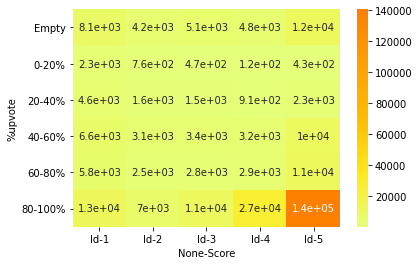

In [52]:
sb.heatmap(pivot,annot=True,cmap='Wistia')

In [53]:
data2=data[data['Score']!=3]
data2.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

###Getting X and y for model training

> Indented block



In [54]:
#turning into classification problem(0,1)
dict={1:0,2:0,4:1,5:1}
y=data2['Score'].map(dict)
y  

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 525814, dtype: int64

In [55]:
X=data2['Text']  

###CountVectorizer

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(stop_words = 'english')

In [57]:
traindata= cv.fit_transform(X)

In [58]:
traindata.shape[1]

114969

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traindata, y, test_size=0.33, random_state=42)

In [60]:
X_train.shape[1]

114969

In [61]:
print("X_train {}".format(X_train.shape[0]),"y_train {}".format(y_train.shape[0]))
print("X_test {}".format(X_test.shape[0]),"y_test {}".format(y_test.shape[0]))

X_train 352295 y_train 352295
X_test 173519 y_test 173519


###Logistic Regression (CountVectorizer)

In [62]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [63]:
model_lr =log.fit(X_train, y_train)

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 19588   7515]
 [  3567 142849]]


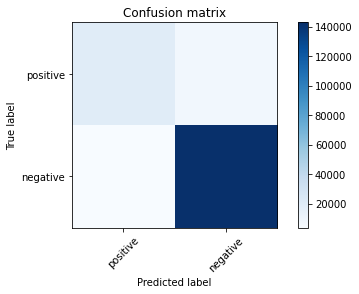

In [66]:
plt.figure()
cm=confusion_matrix(y_test,model_lr.predict(X_test))
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [67]:
from sklearn.metrics import classification_report
acc1 = model_lr.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc1))
print("\n")
report=classification_report(y_test,model_lr.predict(X_test))
print(report)

Model Accuracy: 0.9361337951463529


              precision    recall  f1-score   support

           0       0.85      0.72      0.78     27103
           1       0.95      0.98      0.96    146416

    accuracy                           0.94    173519
   macro avg       0.90      0.85      0.87    173519
weighted avg       0.93      0.94      0.93    173519



###Random Forest (CountVectorizer)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model_rf=RandomForestClassifier(n_estimators=300,max_depth=3,criterion='entropy')

In [70]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greys, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 19588   7515]
 [  3567 142849]]


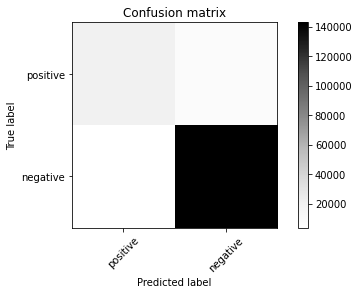

In [73]:
plt.figure()
cm=confusion_matrix(y_test,model_lr.predict(X_test))
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [74]:
from sklearn.metrics import classification_report
acc2 = model_rf.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc2))
print("\n")
report=classification_report(y_test,model_rf.predict(X_test))
print(report)

Model Accuracy: 0.8438038485698972


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27103
           1       0.84      1.00      0.92    146416

    accuracy                           0.84    173519
   macro avg       0.42      0.50      0.46    173519
weighted avg       0.71      0.84      0.77    173519



##Linear Support Vector Machine (CountVectorizer)

In [75]:
from sklearn import svm
from sklearn.svm import SVC, LinearSVC

In [76]:
basicmodel = svm.LinearSVC(C=0.1, class_weight='balanced')
basicmodel = basicmodel.fit(X_train, y_train)

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.YlOrRd, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 23832   3271]
 [ 10544 135872]]


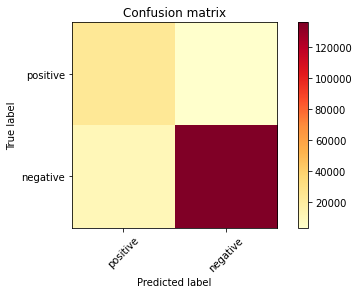

In [79]:
plt.figure()
cm=confusion_matrix(y_test,basicmodel.predict(X_test))
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [80]:
from sklearn.metrics import classification_report
acc5 = basicmodel.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc5))
print("\n")
report=classification_report(y_test,basicmodel.predict(X_test))
print(report)

Model Accuracy: 0.9203833585947361


              precision    recall  f1-score   support

           0       0.69      0.88      0.78     27103
           1       0.98      0.93      0.95    146416

    accuracy                           0.92    173519
   macro avg       0.83      0.90      0.86    173519
weighted avg       0.93      0.92      0.92    173519



###Term frequency-inverse document frequency Vectorizer

In [81]:
X=data2['Text']

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
traindatatdf= tfidf.fit_transform(X)

In [83]:
traindatatdf.shape[1]

114969

In [84]:
from sklearn.model_selection import train_test_split
X_train_tdf, X_test_tdf, y_train_tdf, y_test_tdf = train_test_split(traindatatdf, y, test_size=0.33, random_state=42)

In [85]:
print("X_train {}".format(X_train_tdf.shape[0]),"y_train {}".format(y_train_tdf.shape[0]))
print("X_test {}".format(X_test_tdf.shape[0]),"y_test {}".format(y_test_tdf.shape[0]))

X_train 352295 y_train 352295
X_test 173519 y_test 173519


### Logistic Regression (TD-IDF vectorizer)

In [86]:
from sklearn.linear_model import LogisticRegression
model_lr_tdf=LogisticRegression()

In [87]:
model_lr_tdf.fit(X_train_tdf, y_train_tdf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Pastel1, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 18694   8409]
 [  2945 143471]]


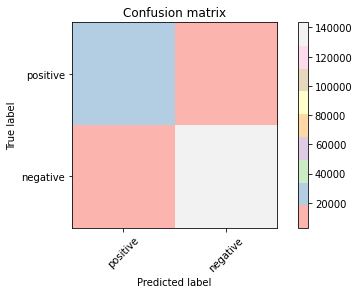

In [89]:
plt.figure()
cm=confusion_matrix(y_test_tdf,model_lr_tdf.predict(X_test_tdf))
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [90]:
from sklearn.metrics import classification_report
acc3 = model_lr_tdf.score(X_test_tdf, y_test_tdf)
print ('Model Accuracy: {}'.format(acc3))
print("\n")
report=classification_report(y_test_tdf,model_lr_tdf.predict(X_test_tdf))
print(report)

Model Accuracy: 0.9345662434661334


              precision    recall  f1-score   support

           0       0.86      0.69      0.77     27103
           1       0.94      0.98      0.96    146416

    accuracy                           0.93    173519
   macro avg       0.90      0.83      0.86    173519
weighted avg       0.93      0.93      0.93    173519



###Random Forest (TF-IDF Vectorizer)




In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
model_rf_tdf=RandomForestClassifier(n_estimators=250,max_depth=3,criterion='entropy')

In [93]:
model_rf_tdf.fit(X_train_tdf, y_train_tdf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 18694   8409]
 [  2945 143471]]


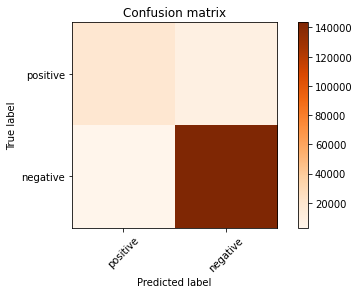

In [96]:
plt.figure()
cm=confusion_matrix(y_test_tdf,model_lr_tdf.predict(X_test_tdf))
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [97]:
from sklearn.metrics import classification_report
acc4 = model_rf_tdf.score(X_test_tdf, y_test_tdf)
print ('Model Accuracy: {}'.format(acc4))
print("\n")
report=classification_report(y_test_tdf,model_rf_tdf.predict(X_test_tdf))
print(report)

Model Accuracy: 0.8438038485698972


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27103
           1       0.84      1.00      0.92    146416

    accuracy                           0.84    173519
   macro avg       0.42      0.50      0.46    173519
weighted avg       0.71      0.84      0.77    173519



###Linear Support Vector Machine (TD-IDF Vectorizer)

In [98]:
basicmodel_tdf= svm.LinearSVC(C=0.1, class_weight='balanced')
basicmodel_tdf.fit(X_train_tdf, y_train_tdf)

LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [99]:
from sklearn.metrics import confusion_matrix

In [106]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.winter, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 24479   2624]
 [ 12941 133475]]


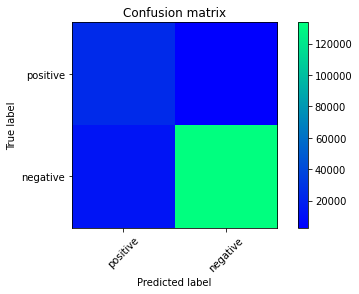

In [107]:
plt.figure()
cm=confusion_matrix(y_test_tdf,basicmodel_tdf.predict(X_test_tdf))
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [108]:
from sklearn.metrics import classification_report
acc6 = basicmodel_tdf.score(X_test_tdf, y_test_tdf)
print ('Model Accuracy: {}'.format(acc6))
print("\n")
report=classification_report(y_test_tdf,basicmodel_tdf.predict(X_test_tdf))
print(report)

Model Accuracy: 0.9102980077109711


              precision    recall  f1-score   support

           0       0.65      0.90      0.76     27103
           1       0.98      0.91      0.94    146416

    accuracy                           0.91    173519
   macro avg       0.82      0.91      0.85    173519
weighted avg       0.93      0.91      0.92    173519



#### Sentiment Analysis With Logistic Regression


In [109]:
features = cv.get_feature_names()
features

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [110]:
coef = model_lr.coef_.tolist()[0]
coef

[-0.28290101662052497,
 0.2642455936653219,
 0.4928843668863599,
 -0.01165753878878838,
 -0.015444779068482482,
 0.0,
 0.0,
 0.00037232553129947757,
 0.00037232553129947757,
 0.0005039759534094373,
 0.0017231215184039246,
 -0.015673146108353325,
 0.0057799476513469335,
 0.011044546957835289,
 -0.3854673239761821,
 0.004505289933694697,
 0.0012580025583896017,
 0.0,
 0.0009123166943364695,
 3.98443839499244e-05,
 0.11891297692287035,
 0.0186539225635927,
 0.029320330300276382,
 0.029320330300276382,
 0.029320330300276382,
 0.029320330300276382,
 0.029320330300276382,
 0.029320330300276382,
 0.029320330300276382,
 0.029320330300276382,
 0.029320330300276382,
 -0.0003651516901950262,
 0.04207666206121026,
 0.00016822674776066767,
 -0.09969359941051327,
 -0.0006365650152589519,
 0.00017045697309197092,
 0.0027661588800605504,
 0.16023797110571736,
 2.7215755436783972e-05,
 -0.10277191666537157,
 0.012542074093279936,
 9.835325887372558e-05,
 0.005528296779714743,
 -0.025538047436031514,
 0

In [112]:
word_coeff = pd.DataFrame({'Word' : features, 'Coefficient' : coef})
word_coeff

,Word,Coefficient
0,00,-0.282901
1,000,0.264246
2,0000,0.492884
3,000001,-0.011658
4,00001,-0.015445
...,...,...
114964,çaykur,0.000000
114965,çelem,0.000000
114966,être,0.000000
114967,île,0.015872


In [114]:
word_coeff = word_coeff.sort_values(['Coefficient', 'Word'],ascending=False)
word_coeff

,Word,Coefficient
80600,pleasantly,3.828897
39072,downside,3.199562
94667,skeptical,2.852172
5865,addicting,2.824547
40135,easiest,2.311358
...,...,...
113164,worst,-2.924555
106852,unacceptable,-2.984308
37560,disappointing,-2.987511
34989,deceptive,-3.539835


In [115]:
print('Positive Sentiments')
print(word_coeff.head(30).to_string(index=False))

Positive Sentiments
          Word  Coefficient
    pleasantly     3.828897
      downside     3.199562
     skeptical     2.852172
     addicting     2.824547
       easiest     2.311358
      drawback     2.273708
        resist     2.245828
        delish     2.244187
      soothing     2.243052
       welcome     2.160956
       worries     2.145323
        brings     2.126226
      thankful     2.100666
    economical     2.091732
      relaxing     2.087028
        hooked     2.064002
          whim     1.981628
     excellent     1.968116
       perfect     1.930908
     delicious     1.925095
        solved     1.923321
           nom     1.904391
 deliciousness     1.897150
  conventional     1.887624
  enthusiastic     1.880463
     delighted     1.868856
         guilt     1.860580
         saves     1.853022
        keeper     1.844013
           met     1.836781


In [116]:
print('Negative Sentiments')        
print(word_coeff.tail(30).to_string(index=False))

Negative Sentiments
           Word  Coefficient
        allegro    -2.056566
           lame    -2.132212
       terrible    -2.137087
        expires    -2.160237
         lacked    -2.173685
  dissapointing    -2.175361
        vomited    -2.202466
      redeeming    -2.207014
       canceled    -2.210208
          lousy    -2.235039
         bummer    -2.277623
        defeats    -2.287488
     unbearable    -2.340885
          ruins    -2.365184
     overpowers    -2.391035
         choked    -2.407086
            ick    -2.439327
     unfinished    -2.447283
 disappointment    -2.576271
    disapointed    -2.602330
    embarrassed    -2.684059
       mediocre    -2.685453
      cancelled    -2.853793
     returnable    -2.910926
         ripoff    -2.917029
          worst    -2.924555
   unacceptable    -2.984308
  disappointing    -2.987511
      deceptive    -3.539835
    undrinkable    -3.689174


In [ ]:
print("{:.2f}".format(acc1*100),"%", "{:.2f}".format(acc2*100),"%","{:.2f}".format(acc3*100), "%", "{:.2f}".format(acc4*100),"%")

In [118]:
data_viz = [['Logistic Regression', acc1*100], ['Random Forest', acc2*100], ['Logistic Regression (TD-IDF)', acc3*100], ['Random Forest (TD-IDF)', acc4*100],['Linear Support Vector Machine (CountVectorizer)', acc5*100],['Linear Support Vector Machine (TD-IDF)', acc6*100]]
plot = pd.DataFrame(data_viz, columns = ['Model', 'Accuracy'])
plot

,Model,Accuracy
0,Logistic Regression,93.613380
1,Random Forest,84.380385
2,Logistic Regression (TD-IDF),93.456624
3,Random Forest (TD-IDF),84.380385
4,Linear Support Vector Machine (CountVectorizer),92.038336
5,Linear Support Vector Machine (TD-IDF),91.029801


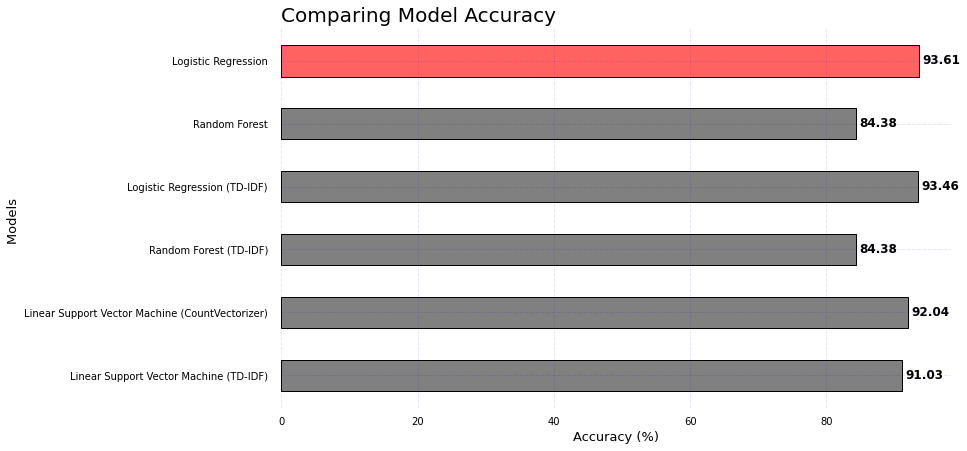

In [121]:
import pandas as pd
from matplotlib import pyplot as plt


# Figure Size
fig, ax = plt.subplots(figsize =(12, 7))

# Horizontal Bar Plot
ax.barh(plot['Model'], plot['Accuracy'],0.5,color=["#ff6361","Grey","Grey","Grey","Grey","Grey"] , edgecolor="Black")

# Removing axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='blue',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.5, i.get_y()+0.3,
			str(round((i.get_width()), 2)),
			fontsize = 12, fontweight ='bold',
			color ='black')

# Add Plot Title
ax.set_title('Comparing Model Accuracy ',
			loc ='left', fontsize=20)

plt.ylabel('Models ', fontsize=13)
plt.xlabel('Accuracy (%)', fontsize=13)

# Show Plot
plt.show()
